<a href="https://colab.research.google.com/github/alexislopes/analise-wine-dataset/blob/master/wine_dataset_cluster_analitics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [26]:
wine = pd.read_csv('wine.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])
x = wine.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values
x

array([[14.23,  1.71,  2.43, ...,  5.64,  1.04,  3.92],
       [13.2 ,  1.78,  2.14, ...,  4.38,  1.05,  3.4 ],
       [13.16,  2.36,  2.67, ...,  5.68,  1.03,  3.17],
       ...,
       [13.27,  4.28,  2.26, ..., 10.2 ,  0.59,  1.56],
       [13.17,  2.59,  2.37, ...,  9.3 ,  0.6 ,  1.62],
       [14.13,  4.1 ,  2.74, ...,  9.2 ,  0.61,  1.6 ]])

In [27]:
wine.tail(5)

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [28]:
wine.head(5)

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [29]:
wine.shape

(178, 14)

In [30]:
X = wine.drop('Cultivator', axis=1)
X.head()

,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [31]:
y = wine['Cultivator']
y.head()
y.unique()

array([1, 2, 3])

## Findind the ideal number of clusters

In [58]:
wcss = [] # within cluster sum of squares
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'random', max_iter = 300)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
wcss

[39787.41159836113,
 17105.15410888413,
 10672.010110093644,
 7507.177700526853,
 6298.81958901044,
 5670.4563786857,
 5030.552462770215,
 4666.2738642049735,
 4245.823925333305,
 3758.9302015062694]

## Ploting the elbow method

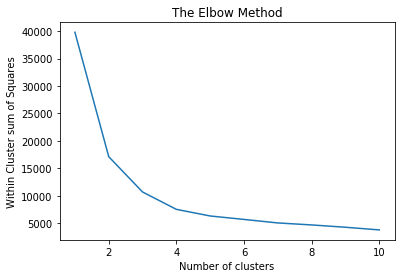

In [64]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster sum of Squares')
plt.show()

## **3 clusters e método de inicialização aleatória**

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'random', max_iter = 300)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

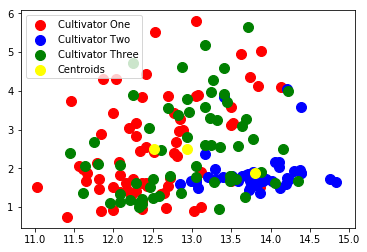

In [38]:
#Poting the cluster into a graph
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cultivator One')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cultivator Two')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cultivator Three')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

## Teste2

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 1, init = 'k-means++', max_iter = 300)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

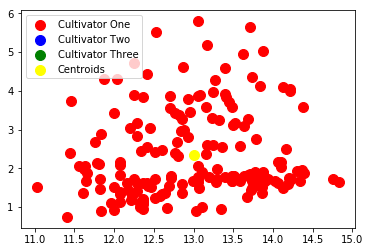

In [40]:
#Poting the cluster into a graph
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cultivator One')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cultivator Two')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cultivator Three')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

## Teste3

In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 500)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

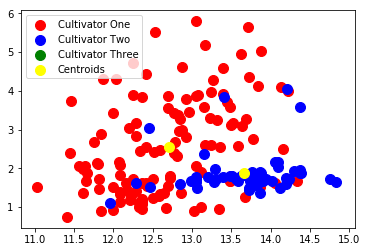

In [43]:
#Poting the cluster into a graph
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cultivator One')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cultivator Two')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cultivator Three')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

## Teste4

In [65]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, init = 'random', max_iter = 500)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([3, 3, 2, 2, 0, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 0, 0,
       3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 3, 1, 1, 3, 3, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 3, 3, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 3,
       3, 0], dtype=int32)

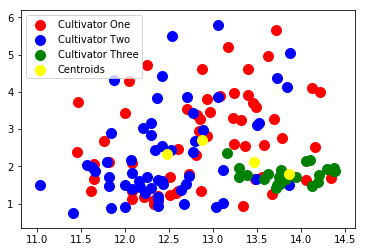

In [66]:
#Poting the cluster into a graph
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cultivator One')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cultivator Two')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cultivator Three')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

## Teste5

In [46]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, init = 'random', max_iter = 700)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 2, 3, 3, 1, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 1, 1,
       2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1], dtype=int32)

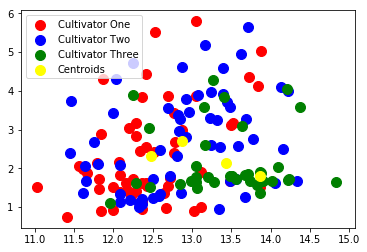

In [47]:
#Poting the cluster into a graph
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cultivator One')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cultivator Two')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cultivator Three')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

## Teste6

In [48]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'random', max_iter = 500)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, 4, 2, 4, 4, 4, 0, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 2, 2, 2,
       0, 0, 2, 2, 0, 4, 2, 0, 4, 4, 0, 4, 0, 2, 2, 0, 0, 2, 2, 0, 0, 3,
       2, 0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 0, 0, 4, 4, 1, 3, 1, 3, 1, 1, 3,
       1, 1, 2, 3, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 3, 3, 1, 1, 1, 1, 3,
       3, 3, 1, 1, 1, 1, 1, 2, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3,
       3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 2, 1, 3, 2, 2, 1, 3, 3, 3, 1, 1, 1, 3,
       3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 2, 3, 1, 1, 3, 2, 2, 2,
       2, 3], dtype=int32)

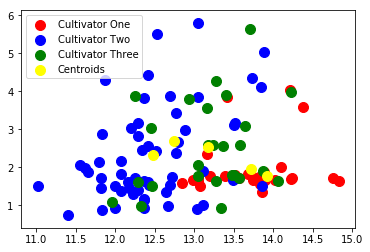

In [49]:
#Poting the cluster into a graph
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cultivator One')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cultivator Two')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cultivator Three')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

## Teste7

In [50]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6, init = 'random', max_iter = 600)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([3, 3, 0, 2, 4, 2, 0, 0, 3, 3, 2, 0, 0, 3, 2, 0, 0, 3, 2, 4, 4, 4,
       3, 3, 4, 4, 0, 0, 4, 3, 0, 2, 3, 0, 3, 4, 4, 3, 3, 4, 4, 3, 3, 5,
       4, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 1, 5, 1, 5, 1, 1, 5,
       1, 1, 4, 5, 4, 1, 1, 3, 4, 1, 1, 1, 4, 1, 1, 5, 5, 1, 1, 1, 1, 5,
       5, 5, 1, 1, 1, 1, 1, 3, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 1, 1, 1, 5,
       5, 1, 5, 1, 1, 1, 1, 1, 1, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 1,
       5, 5, 5, 5, 5, 1, 5, 5, 5, 4, 1, 5, 4, 4, 1, 5, 5, 5, 1, 1, 1, 5,
       5, 5, 1, 4, 5, 5, 1, 5, 5, 5, 5, 1, 5, 5, 4, 5, 1, 1, 5, 4, 4, 4,
       4, 5], dtype=int32)

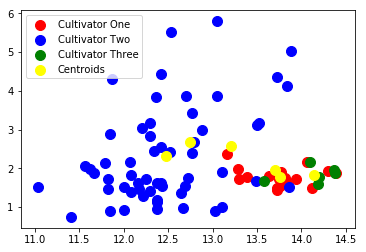

In [51]:
#Poting the cluster into a graph
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cultivator One')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cultivator Two')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cultivator Three')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

## Teste8

In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 7, init = 'random', max_iter = 700)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 2, 3, 0, 3, 2, 2, 1, 1, 3, 2, 2, 1, 3, 2, 2, 1, 3, 4, 4, 4,
       1, 1, 4, 4, 2, 2, 4, 1, 2, 3, 1, 2, 1, 4, 4, 1, 1, 0, 4, 1, 1, 0,
       4, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 6, 0, 6, 0, 5, 5, 0,
       6, 6, 0, 0, 4, 5, 6, 1, 4, 5, 5, 6, 0, 6, 5, 0, 0, 6, 6, 6, 6, 6,
       0, 0, 6, 6, 6, 5, 5, 4, 0, 5, 0, 5, 0, 6, 5, 5, 0, 5, 6, 6, 5, 0,
       6, 5, 0, 5, 5, 5, 6, 5, 5, 6, 0, 6, 5, 5, 5, 5, 5, 6, 5, 6, 0, 6,
       6, 0, 0, 0, 0, 6, 6, 6, 0, 4, 6, 6, 4, 4, 5, 0, 0, 6, 6, 6, 5, 0,
       0, 0, 6, 4, 0, 0, 6, 0, 6, 0, 0, 6, 0, 0, 0, 0, 6, 6, 0, 0, 0, 4,
       4, 6], dtype=int32)

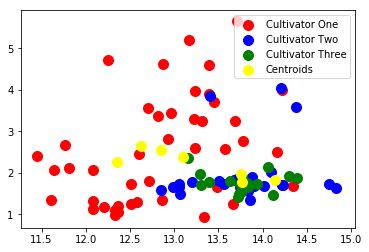

In [53]:
#Poting the cluster into a graph
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cultivator One')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cultivator Two')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cultivator Three')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

## Teste9

In [54]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 800)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 2, 1, 6, 7, 6, 1, 1, 2, 2, 6, 1, 1, 2, 6, 1, 1, 2, 6, 4, 7, 7,
       2, 2, 4, 4, 1, 1, 4, 2, 1, 6, 2, 1, 2, 4, 4, 2, 2, 7, 7, 2, 2, 0,
       4, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 5, 0, 5, 0, 3, 3, 0,
       5, 5, 7, 7, 4, 3, 5, 2, 4, 3, 3, 5, 7, 5, 3, 7, 0, 5, 5, 5, 5, 5,
       0, 0, 5, 5, 5, 3, 3, 4, 0, 3, 0, 3, 7, 5, 3, 3, 0, 3, 5, 5, 3, 0,
       5, 3, 0, 3, 3, 3, 5, 3, 3, 5, 0, 5, 3, 3, 3, 3, 3, 5, 3, 0, 0, 5,
       5, 0, 0, 7, 7, 5, 0, 0, 0, 7, 5, 5, 4, 4, 3, 0, 0, 5, 5, 5, 3, 0,
       0, 7, 5, 4, 0, 0, 5, 0, 5, 0, 0, 5, 7, 0, 7, 0, 5, 5, 0, 7, 7, 4,
       4, 5], dtype=int32)

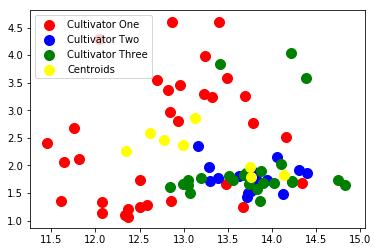

In [55]:
#Poting the cluster into a graph
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cultivator One')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cultivator Two')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cultivator Three')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

## Teste10

In [56]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 9, init = 'k-means++', max_iter = 1000)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 4, 2, 3, 2, 4, 4, 0, 0, 2, 4, 4, 0, 2, 4, 4, 0, 2, 6, 3, 3,
       0, 0, 6, 6, 4, 4, 6, 0, 4, 2, 0, 4, 0, 6, 6, 0, 0, 3, 3, 0, 0, 7,
       6, 0, 0, 0, 0, 4, 0, 4, 4, 4, 0, 0, 0, 4, 4, 1, 7, 8, 7, 8, 5, 7,
       1, 1, 3, 3, 6, 8, 8, 0, 6, 8, 5, 1, 3, 8, 5, 3, 7, 1, 1, 8, 1, 1,
       7, 7, 8, 8, 1, 5, 5, 6, 7, 8, 7, 8, 3, 1, 8, 8, 7, 5, 1, 1, 5, 7,
       1, 5, 7, 8, 5, 8, 1, 5, 5, 1, 7, 8, 5, 5, 5, 5, 5, 8, 5, 1, 7, 1,
       1, 7, 7, 3, 3, 1, 1, 7, 7, 3, 1, 1, 6, 6, 8, 7, 7, 1, 1, 8, 8, 7,
       7, 3, 8, 6, 7, 7, 1, 7, 1, 7, 7, 1, 3, 7, 3, 7, 1, 8, 7, 3, 3, 6,
       6, 1], dtype=int32)

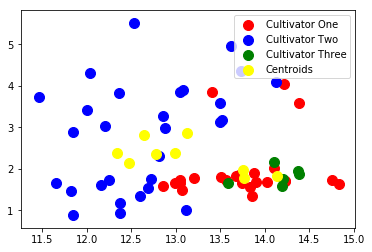

In [57]:
#Poting the cluster into a graph
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cultivator One')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cultivator Two')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cultivator Three')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()